In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Load the data
sales_train_validation = pd.read_csv('C:/Users/User/PycharmProjects/M5 Forecasting - Accuracy/data/sales_train_validation.csv')
calendar = pd.read_csv('C:/Users/User/PycharmProjects/M5 Forecasting - Accuracy/data/calendar.csv')
sell_prices = pd.read_csv('C:/Users/User/PycharmProjects/M5 Forecasting - Accuracy/data/sell_prices.csv')

# Display the first few rows of each dataframe to verify they are loaded correctly
print("Sales Train Validation Data:")
print(sales_train_validation.head())
print(sales_train_validation.columns)

print("\nCalendar Data:")
print(calendar.head())
print(calendar.columns)

print("\nSell Prices Data:")
print(sell_prices.head())
print(sell_prices.columns)

Sales Train Validation Data:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_19

In [3]:
# Melt the sales data to long format
sales_train_validation = sales_train_validation.melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
    var_name='day', 
    value_name='sales'
)

# Display the melted data
print("\nMelted Sales Train Validation Data:")
print(sales_train_validation.head())



Melted Sales Train Validation Data:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  day  sales  
0       CA  d_1      0  
1       CA  d_1      0  
2       CA  d_1      0  
3       CA  d_1      0  
4       CA  d_1      0  


In [4]:
# Merge with the calendar data
sales_train_validation = sales_train_validation.merge(calendar, left_on='day', right_on='d')

# Display the merged data
print("\nSales Train Validation Data after merging with Calendar:")
print(sales_train_validation.head())



Sales Train Validation Data after merging with Calendar:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  day  sales        date  wm_yr_wk  ... month  year    d  \
0       CA  d_1      0  2011-01-29     11101  ...     1  2011  d_1   
1       CA  d_1      0  2011-01-29     11101  ...     1  2011  d_1   
2       CA  d_1      0  2011-01-29     11101  ...     1  2011  d_1   
3       CA  d_1      0  2011-01-29     11101  ...     1  2011  d_1   
4       CA  d_1      0  2011-01-29     11101  ...     1  2011  d_1   

   event_name_1 event_type_1 event_name_

In [5]:
# Merge with the sell prices data
sales_train_validation = sales_train_validation.merge(sell_prices, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')

# Display the merged data
print("\nSales Train Validation Data after merging with Sell Prices:")
print(sales_train_validation.head())



Sales Train Validation Data after merging with Sell Prices:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  day  sales        date  wm_yr_wk  ...  year    d  event_name_1  \
0       CA  d_1      0  2011-01-29     11101  ...  2011  d_1           NaN   
1       CA  d_1      0  2011-01-29     11101  ...  2011  d_1           NaN   
2       CA  d_1      0  2011-01-29     11101  ...  2011  d_1           NaN   
3       CA  d_1      0  2011-01-29     11101  ...  2011  d_1           NaN   
4       CA  d_1      0  2011-01-29     11101  ...  2011  d_1        

In [6]:
###FEATURE ENGINEERING
# Date features
sales_train_validation['day'] = sales_train_validation['date'].apply(lambda x: x[-2:]).astype(int)
sales_train_validation['weekday'] = pd.to_datetime(sales_train_validation['date']).dt.weekday
sales_train_validation['month'] = pd.to_datetime(sales_train_validation['date']).dt.month
sales_train_validation['year'] = pd.to_datetime(sales_train_validation['date']).dt.year
sales_train_validation['dayofyear'] = pd.to_datetime(sales_train_validation['date']).dt.dayofyear
sales_train_validation['weekofyear'] = pd.to_datetime(sales_train_validation['date']).dt.isocalendar().week
sales_train_validation['quarter'] = pd.to_datetime(sales_train_validation['date']).dt.quarter

# Display the data with new features
print("\nData with Date Features:")
print(sales_train_validation.head())



Data with Date Features:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  day  sales        date  wm_yr_wk  ...  event_type_1  event_name_2  \
0       CA   29      0  2011-01-29     11101  ...           NaN           NaN   
1       CA   29      0  2011-01-29     11101  ...           NaN           NaN   
2       CA   29      0  2011-01-29     11101  ...           NaN           NaN   
3       CA   29      0  2011-01-29     11101  ...           NaN           NaN   
4       CA   29      0  2011-01-29     11101  ...           NaN           NaN   

   eve

In [7]:
# Rolling window features
sales_train_validation['rolling_mean_7'] = sales_train_validation.groupby(['id'])['sales'].shift(1).rolling(window=7).mean()
sales_train_validation['rolling_std_7'] = sales_train_validation.groupby(['id'])['sales'].shift(1).rolling(window=7).std()
sales_train_validation['rolling_mean_30'] = sales_train_validation.groupby(['id'])['sales'].shift(1).rolling(window=30).mean()
sales_train_validation['rolling_std_30'] = sales_train_validation.groupby(['id'])['sales'].shift(1).rolling(window=30).std()

# Display the data with rolling window features
print("\nData with Rolling Window Features:")
print(sales_train_validation.head())



Data with Rolling Window Features:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  day  sales        date  wm_yr_wk  ...  snap_TX  snap_WI  \
0       CA   29      0  2011-01-29     11101  ...        0        0   
1       CA   29      0  2011-01-29     11101  ...        0        0   
2       CA   29      0  2011-01-29     11101  ...        0        0   
3       CA   29      0  2011-01-29     11101  ...        0        0   
4       CA   29      0  2011-01-29     11101  ...        0        0   

   sell_price  dayofyear weekofyear quarter rolling_mean

In [8]:
# Check for NaN values
print("\nNaN values in the dataset:")
print(sales_train_validation.isna().sum())



NaN values in the dataset:
id                        0
item_id                   0
dept_id                   0
cat_id                    0
store_id                  0
state_id                  0
day                       0
sales                     0
date                      0
wm_yr_wk                  0
weekday                   0
wday                      0
month                     0
year                      0
d                         0
event_name_1       53631910
event_type_1       53631910
event_name_2       58205410
event_type_2       58205410
snap_CA                   0
snap_TX                   0
snap_WI                   0
sell_price         12299413
dayofyear                 0
weekofyear                0
quarter                   0
rolling_mean_7        30496
rolling_std_7         30496
rolling_mean_30       30519
rolling_std_30        30519
dtype: int64


In [9]:
# Handle NaN values in event columns by filling with 'None'
sales_train_validation['event_name_1'] = sales_train_validation['event_name_1'].fillna('None')
sales_train_validation['event_type_1'] = sales_train_validation['event_type_1'].fillna('None')
sales_train_validation['event_name_2'] = sales_train_validation['event_name_2'].fillna('None')
sales_train_validation['event_type_2'] = sales_train_validation['event_type_2'].fillna('None')

# Handle NaN values in sell_price column by filling with the mean price of that item
sales_train_validation['sell_price'] = sales_train_validation.groupby('item_id')['sell_price'].transform(lambda x: x.fillna(x.mean()))

# Verify NaN handling
print("\nNaN values after handling:")
print(sales_train_validation.isna().sum())



NaN values after handling:
id                     0
item_id                0
dept_id                0
cat_id                 0
store_id               0
state_id               0
day                    0
sales                  0
date                   0
wm_yr_wk               0
weekday                0
wday                   0
month                  0
year                   0
d                      0
event_name_1           0
event_type_1           0
event_name_2           0
event_type_2           0
snap_CA                0
snap_TX                0
snap_WI                0
sell_price             0
dayofyear              0
weekofyear             0
quarter                0
rolling_mean_7     30496
rolling_std_7      30496
rolling_mean_30    30519
rolling_std_30     30519
dtype: int64


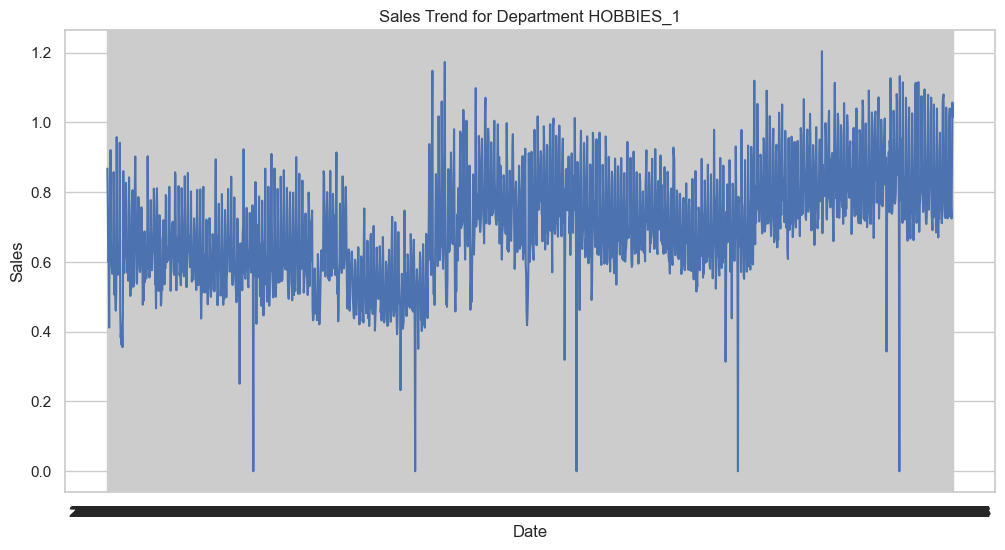

In [13]:
# Analyzing Seasonality, Trend, and Cycles by Department ID
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique department ids
dept_ids = sales_train_validation['dept_id'].unique()

# Analyzing for one department (replace with actual Dept Id)
dept_id_to_analyze = dept_ids[0]  # Replace with actual Dept Id

# Filter data for the chosen department
dept_data = sales_train_validation[sales_train_validation['dept_id'] == dept_id_to_analyze].copy()

# Plot sales over time for the chosen department
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=dept_data, errorbar=None)
plt.title(f'Sales Trend for Department {dept_id_to_analyze}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

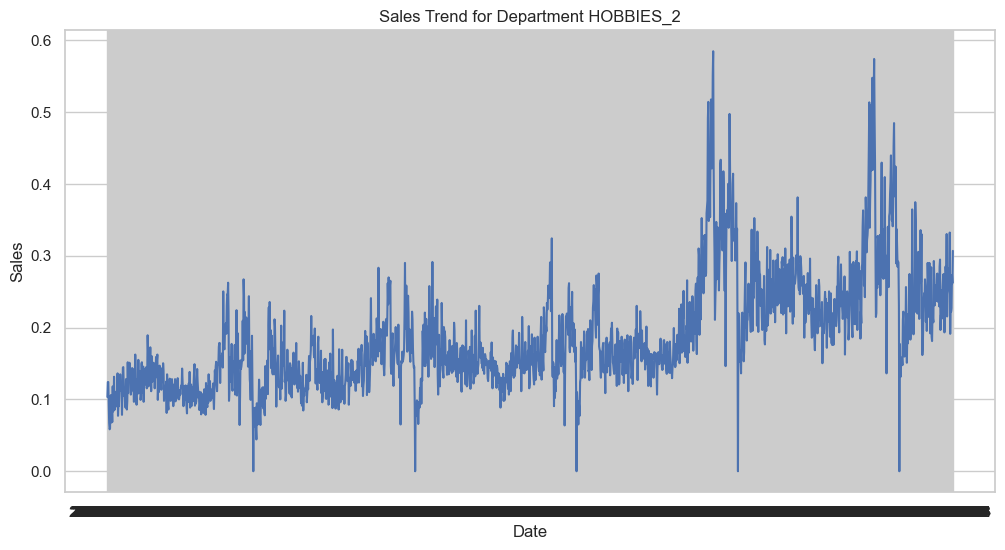

In [14]:
# Analyzing for one department (replace with actual Dept Id)
dept_id_to_analyze = dept_ids[1]  # Replace with actual Dept Id

# Filter data for the chosen department
dept_data = sales_train_validation[sales_train_validation['dept_id'] == dept_id_to_analyze].copy()

# Plot sales over time for the chosen department
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=dept_data, errorbar=None)
plt.title(f'Sales Trend for Department {dept_id_to_analyze}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

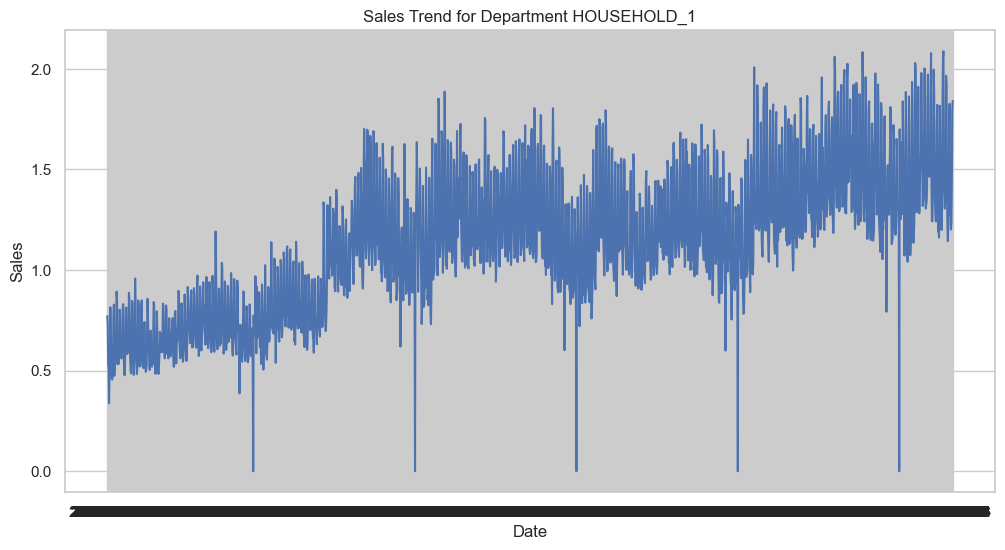

In [15]:
# Analyzing for one department (replace with actual Dept Id)
dept_id_to_analyze = dept_ids[2]  # Replace with actual Dept Id

# Filter data for the chosen department
dept_data = sales_train_validation[sales_train_validation['dept_id'] == dept_id_to_analyze].copy()

# Plot sales over time for the chosen department
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=dept_data, errorbar=None)
plt.title(f'Sales Trend for Department {dept_id_to_analyze}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

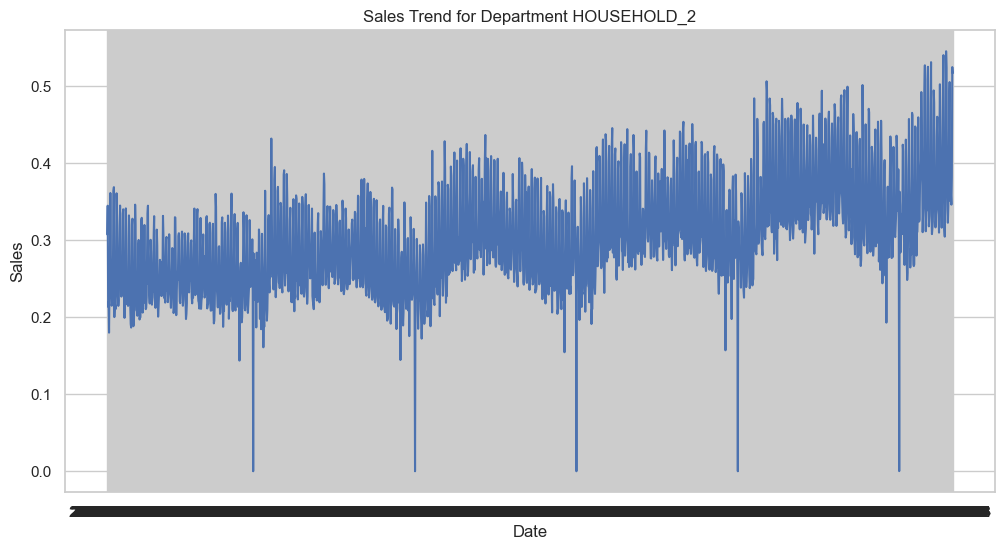

In [16]:
# Analyzing for one department (replace with actual Dept Id)
dept_id_to_analyze = dept_ids[3]  # Replace with actual Dept Id

# Filter data for the chosen department
dept_data = sales_train_validation[sales_train_validation['dept_id'] == dept_id_to_analyze].copy()

# Plot sales over time for the chosen department
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=dept_data, errorbar=None)
plt.title(f'Sales Trend for Department {dept_id_to_analyze}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

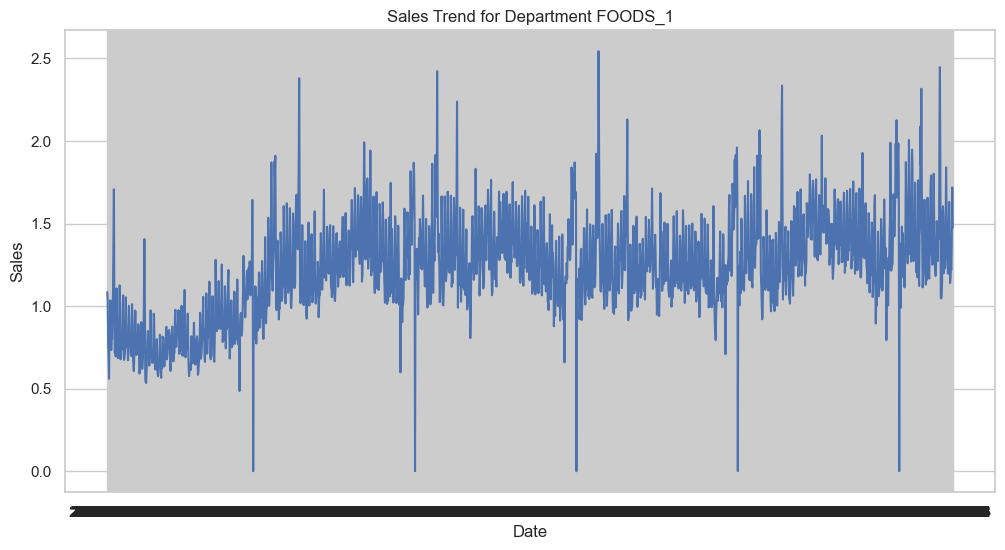

In [17]:
# Analyzing for one department (replace with actual Dept Id)
dept_id_to_analyze = dept_ids[4]  # Replace with actual Dept Id

# Filter data for the chosen department
dept_data = sales_train_validation[sales_train_validation['dept_id'] == dept_id_to_analyze].copy()

# Plot sales over time for the chosen department
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=dept_data, errorbar=None)
plt.title(f'Sales Trend for Department {dept_id_to_analyze}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

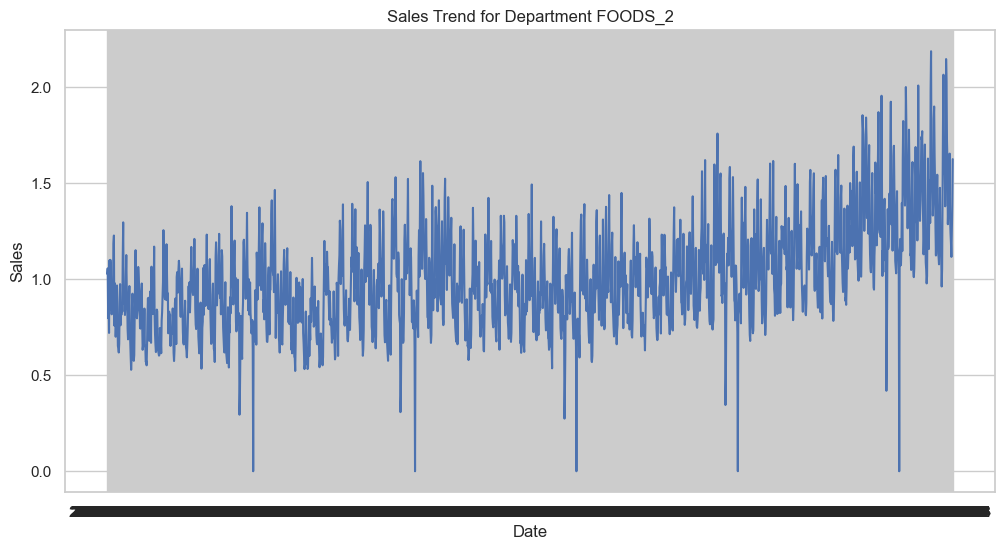

In [18]:
# Analyzing for one department (replace with actual Dept Id)
dept_id_to_analyze = dept_ids[5]  # Replace with actual Dept Id

# Filter data for the chosen department
dept_data = sales_train_validation[sales_train_validation['dept_id'] == dept_id_to_analyze].copy()

# Plot sales over time for the chosen department
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=dept_data, errorbar=None)
plt.title(f'Sales Trend for Department {dept_id_to_analyze}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

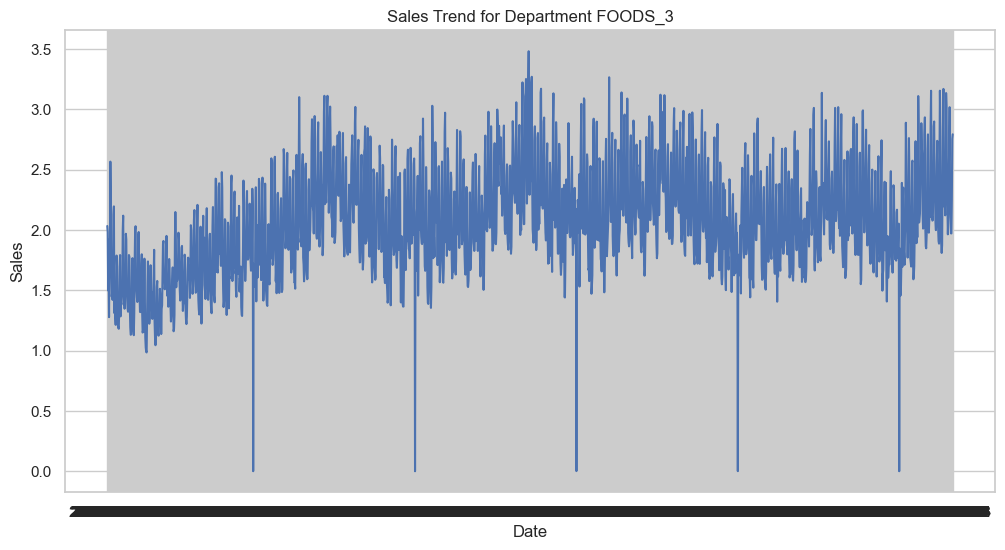

In [20]:
# Analyzing for one department (replace with actual Dept Id)
dept_id_to_analyze = dept_ids[6]  # Replace with actual Dept Id

# Filter data for the chosen department
dept_data = sales_train_validation[sales_train_validation['dept_id'] == dept_id_to_analyze].copy()

# Plot sales over time for the chosen department
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=dept_data, errorbar=None)
plt.title(f'Sales Trend for Department {dept_id_to_analyze}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

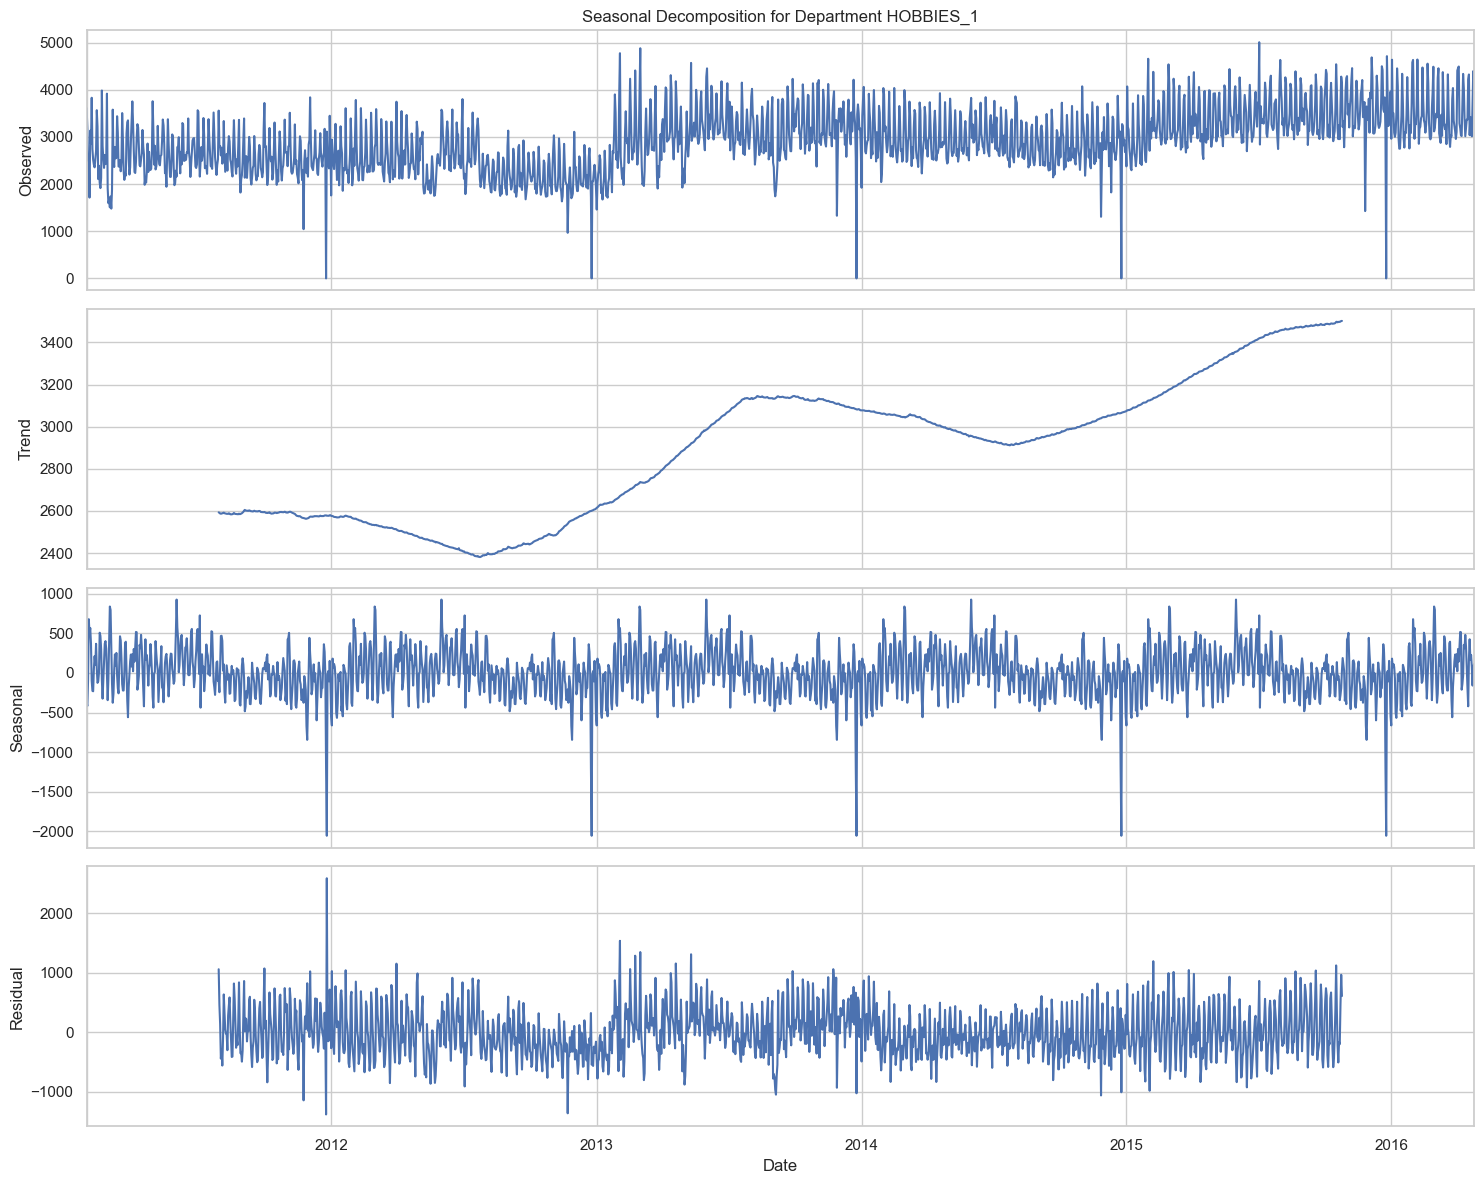

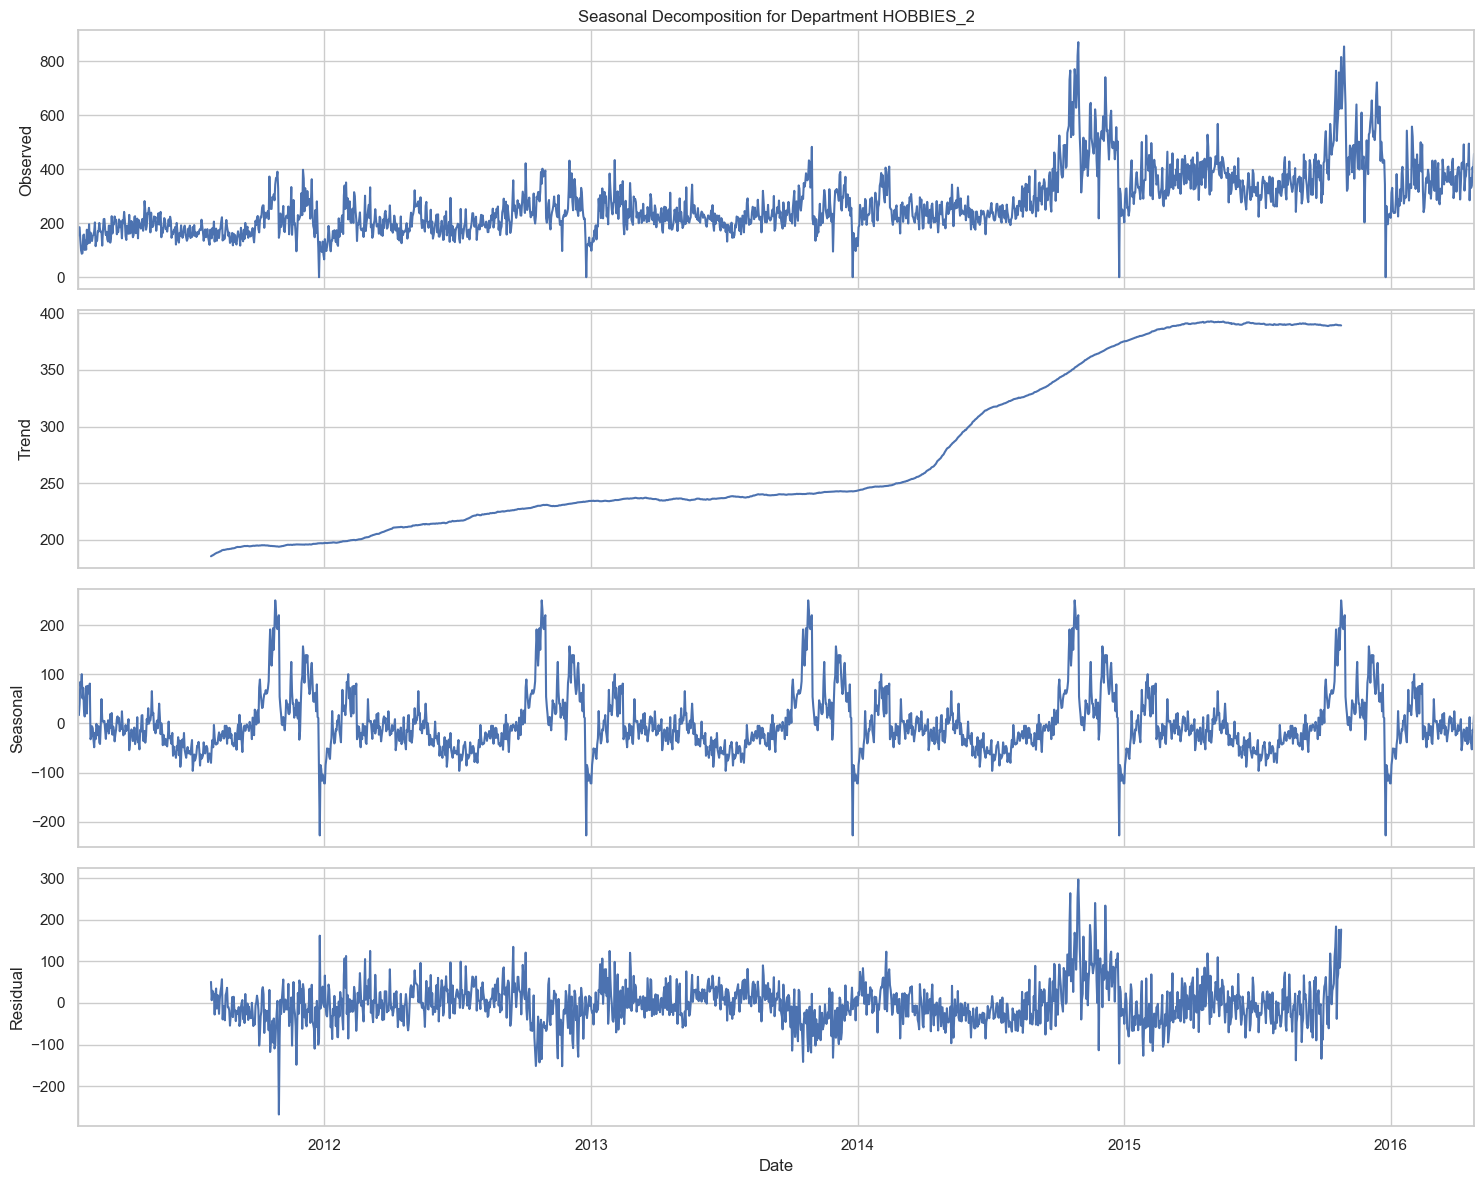

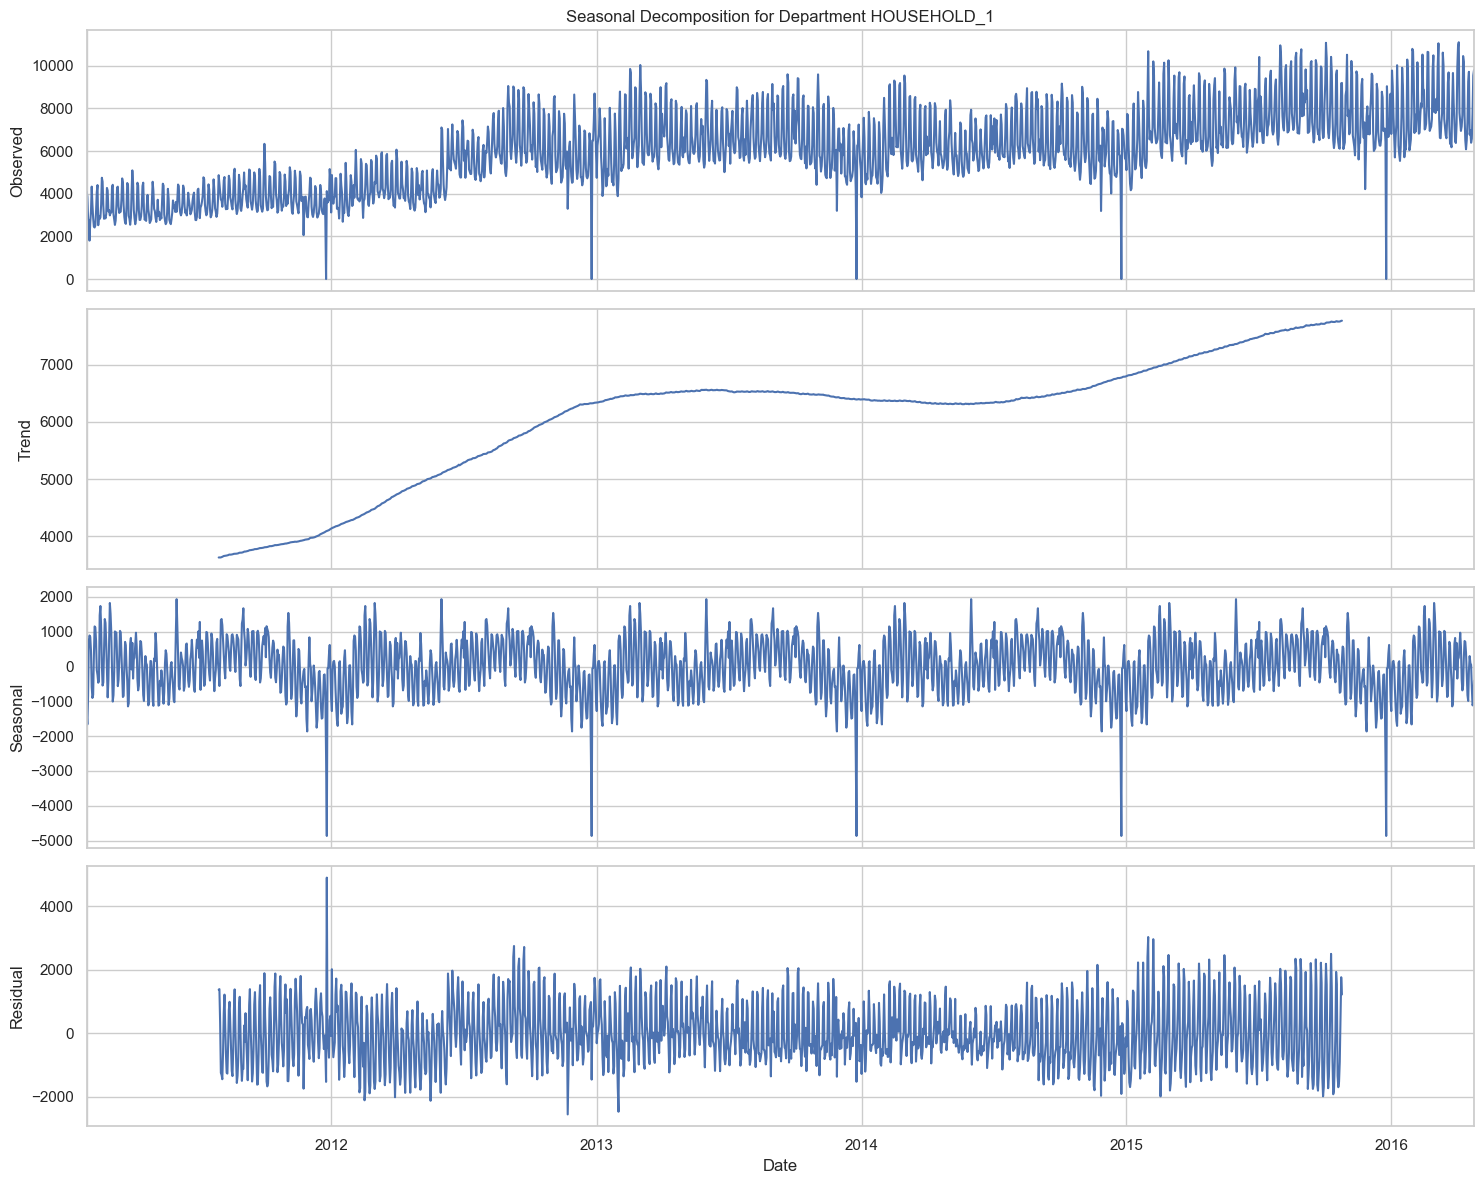

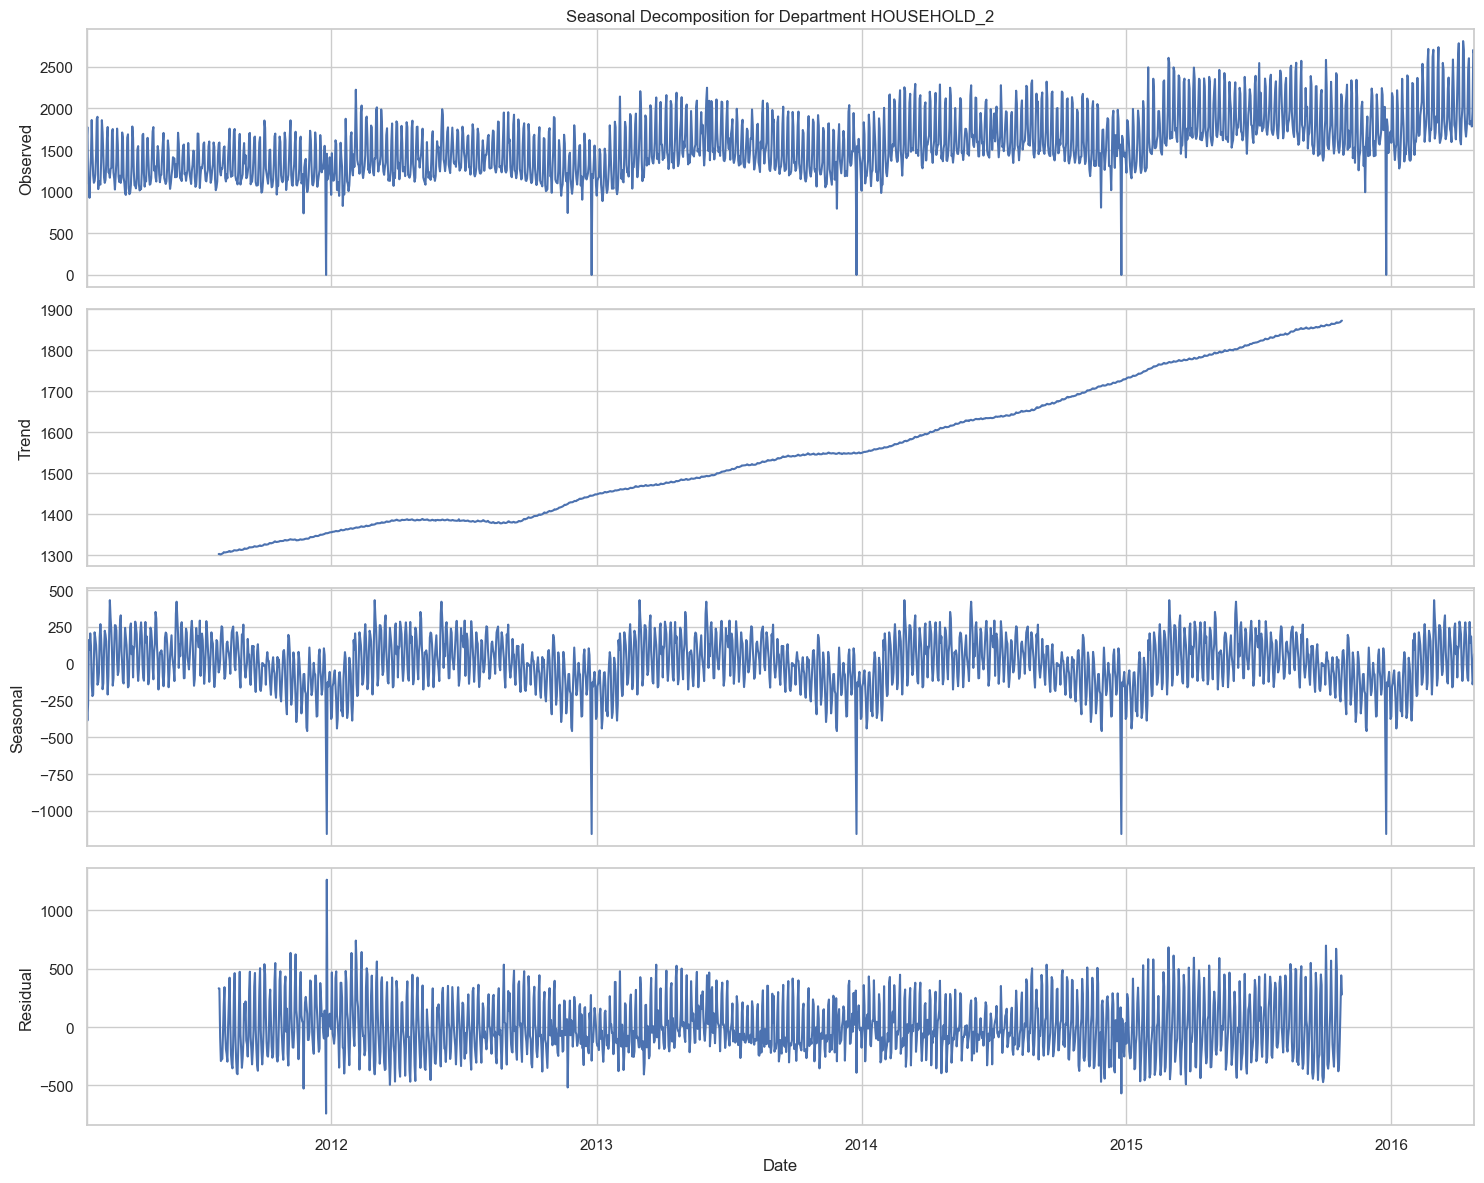

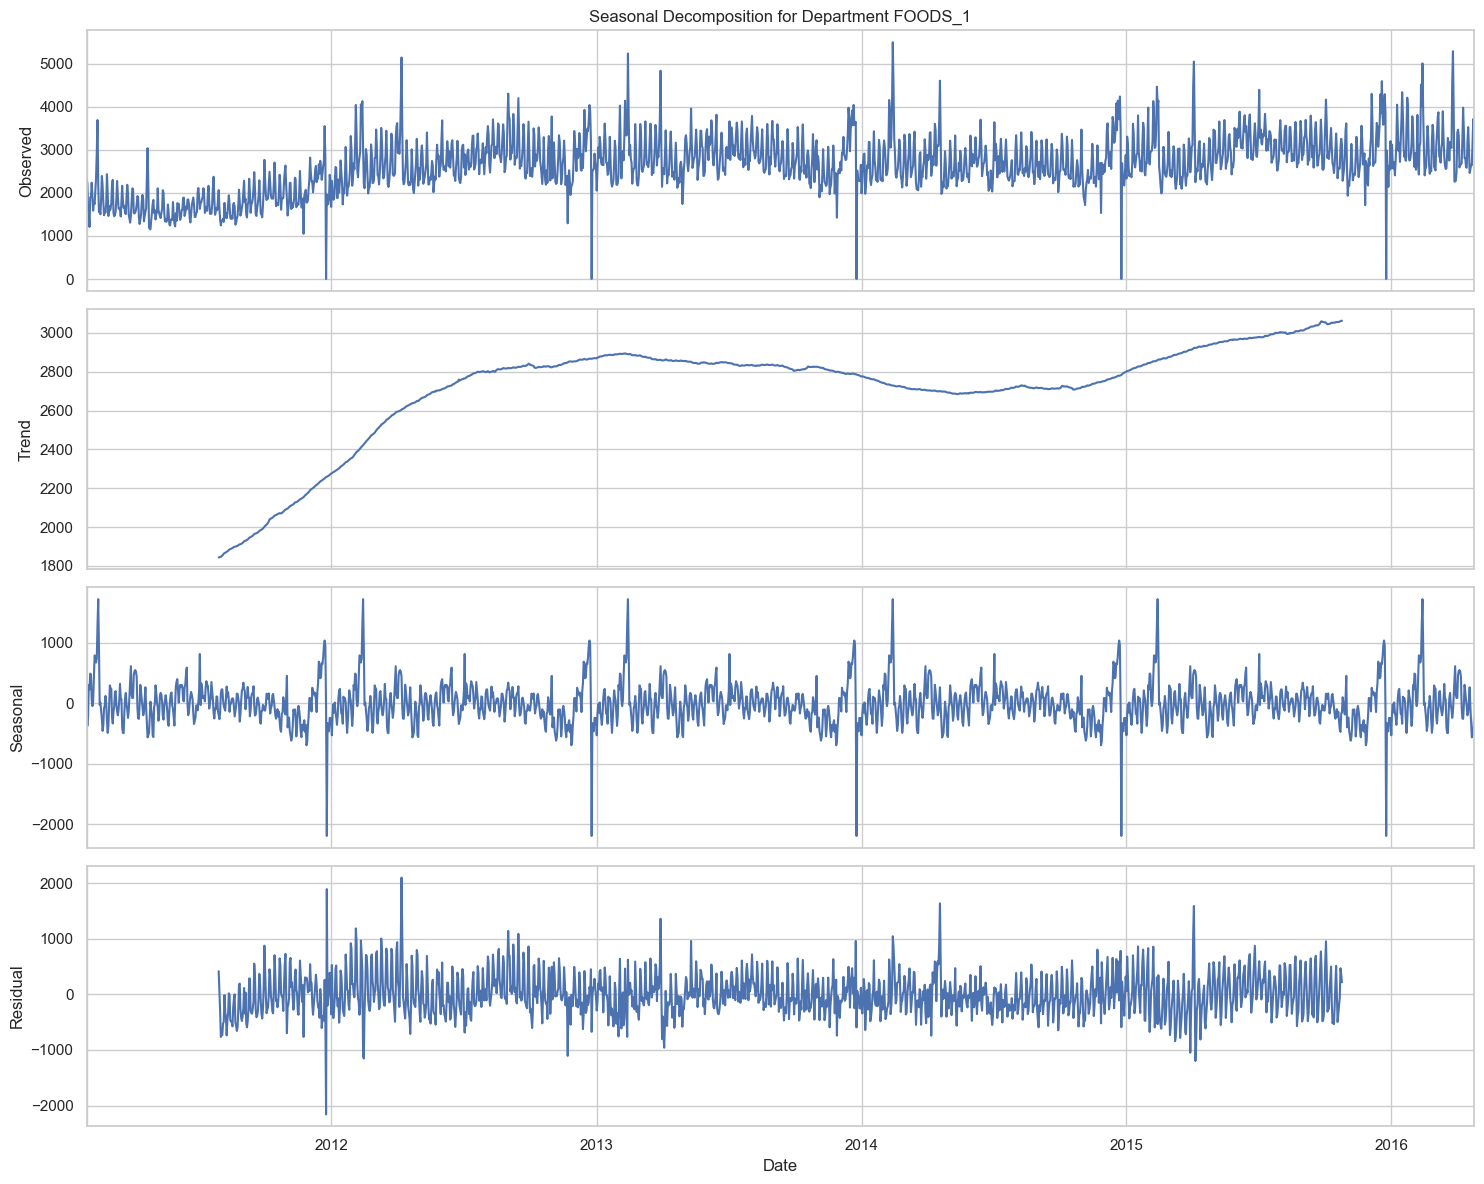

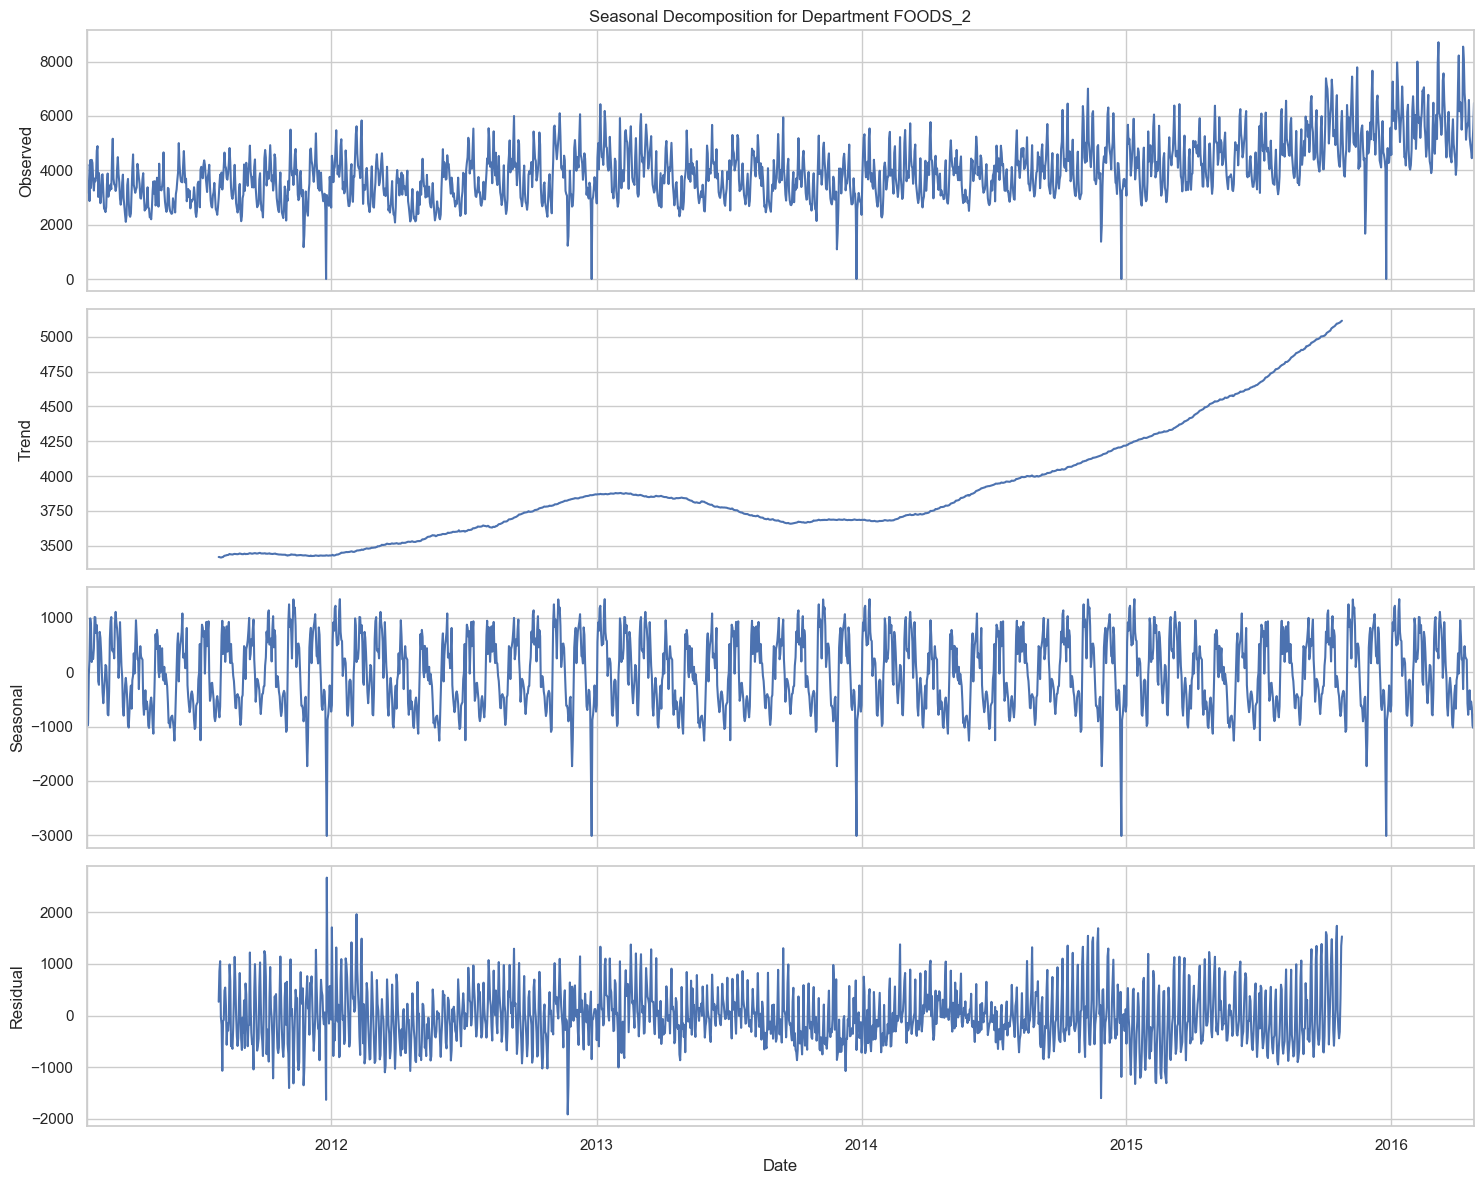

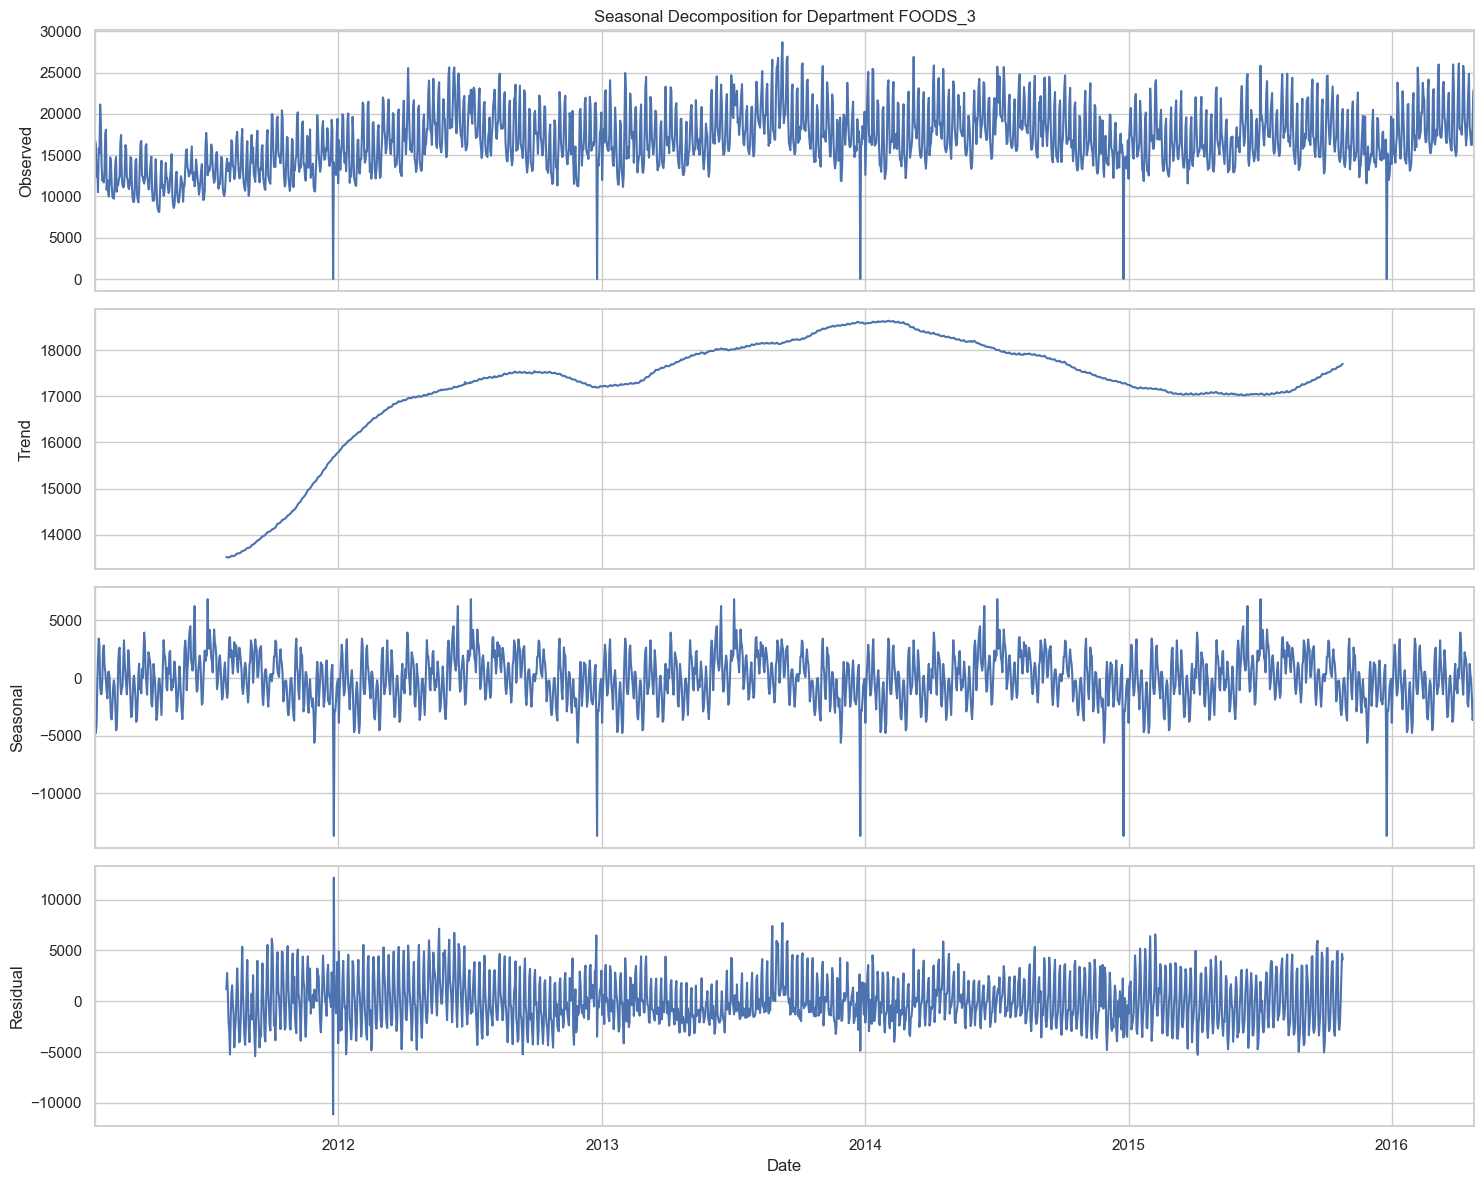

In [23]:
## Decomposition of Sales Data for Each Department

from statsmodels.tsa.seasonal import seasonal_decompose
# Ensure the 'date' column is in datetime format
sales_train_validation['date'] = pd.to_datetime(sales_train_validation['date'])

# List of department IDs
dept_ids = ['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1', 'FOODS_2', 'FOODS_3']

for dept_id in dept_ids:
    # Filter data for the department
    dept_data = sales_train_validation[sales_train_validation['dept_id'] == dept_id].copy()

    # Aggregate sales by date
    dept_daily_sales = dept_data.groupby('date')['sales'].sum().reset_index()

    # Set date as index for decomposition
    dept_daily_sales.set_index('date', inplace=True)

    # Perform seasonal decomposition using the additive model
    decomposition = seasonal_decompose(dept_daily_sales['sales'], model='additive', period=365)

    # Plot decomposition
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
    decomposition.observed.plot(ax=ax1)
    ax1.set_ylabel('Observed')
    ax1.set_title(f'Seasonal Decomposition for Department {dept_id}')
    decomposition.trend.plot(ax=ax2)
    ax2.set_ylabel('Trend')
    decomposition.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposition.resid.plot(ax=ax4)
    ax4.set_ylabel('Residual')
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()